In [270]:
# Data manipulation
import numpy as np
import pandas as pd

# Sci-kit learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import os
from sklearn.linear_model import Lasso, Ridge

# Visualization
import seaborn as sns
from matplotlib import pyplot as plt

In [271]:
base_path = r'C:\Users\frank\OneDrive\Desktop\Machine Learning\PS#4'
path = os.path.join(base_path,'Data-College.csv')
college_data = pd.read_csv(path)

# Question 9(a)

In [272]:
college_data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [273]:
college_data.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [274]:
private_dict = {'Yes':1, 'No':0}
college_data.replace({'Private':private_dict}, inplace=True)

In [275]:
https://www.youtube.com/watch?v=TCs76viuWro

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 37)

# Question 9(b)

In [277]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [278]:
reg = LinearRegression().fit(X_train, y_train)

In [279]:
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.9136406014998273
0.9262557108341712


In [280]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

1222954.038253446

The MSE is 1222954.038253446.

# Question 9(e)

In [281]:
kf = KFold(n_splits=10, random_state = 1, shuffle=True)
pca = PCA()
X_train_rdc = pca.fit_transform(X_train)
ls = LinearRegression()
pcr_test_mse = []
for m in range(1, len(X.columns)+1):
    pcr_cv_results = cross_val_score(ls, X_train_rdc[:,:m], y_train, cv=kf, scoring='neg_mean_squared_error').mean()
    pcr_test_mse.append(-pcr_cv_results)   
pcr_test_mse
len(pcr_test_mse)
min_val = min(pcr_test_mse)
opt_m_pcr = pcr_test_mse.index(min_val) + 1
print(opt_m_pcr)

16


In [282]:
# Define the PCR pipeline
pcr = make_pipeline(
    StandardScaler(),       # First transformer
    PCA(n_components=16),    # Second transformer
    LinearRegression()      # Estimator
)

# Fit the PCR pipeline on the training data
pcr.fit(X_train, y_train)

# Assess the fit using the test data
y_predict = pcr.predict(X_test)
mean_squared_error(y_test, y_predict)

1487304.1279126813

Text(0.5, 1.0, 'Principal Component Regression')

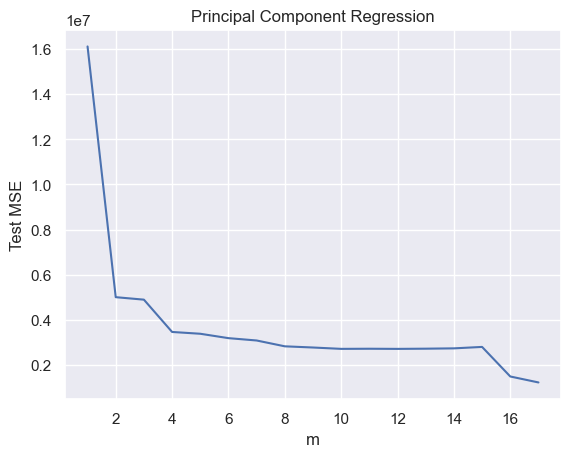

In [283]:
# Storing the MSEs
test_mse = {}

# Perform PCR for all possible number of principal components
for m in range(1, X_train.shape[1]+1):
    pcr = make_pipeline(
        StandardScaler(),
        PCA(n_components=m),
        LinearRegression()
    ).fit(X_train, y_train)

    test_mse[m] = mean_squared_error(
        y_test,
        pcr.predict(X_test)
    )

# Visualize the results
plt.figure(facecolor='white')
plt.plot(list(test_mse.keys()), list(test_mse.values()))
plt.xlabel('m')
plt.ylabel('Test MSE')
plt.title('Principal Component Regression')

The M chosen by cross-validation was 16. The MSE is 1487304.1279126813. 

# Question 9(f)

In [284]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, len(X.columns)+1):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, X_train, y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)
min_val = min(mse)
opt_m_pls = mse.index(min_val) + 1
print(opt_m_pls)

9


In [285]:
# Partial least squares with 5 principal components
pls = PLSRegression(n_components=9, scale=True)
pls.fit(X_train, y_train)

# Evaluate the model
y_predict = pls.predict(X_test)
mean_squared_error(y_test, y_predict)

1300987.6971973462

Text(0.5, 1.0, 'Partial Least Squares')

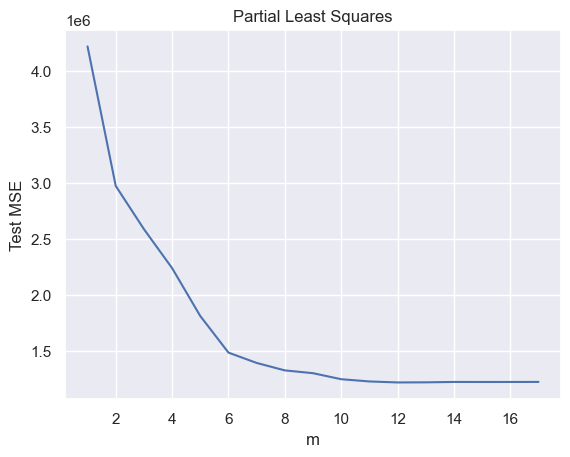

In [286]:
# Storing the MSEs
test_mse = {}

# Perform PCR for all possible number of principal components
for m in range(1, X_train.shape[1]+1):
    pls = PLSRegression(
        n_components=m,
        scale=True
    ).fit(X_train, y_train)
    
    test_mse[m] = mean_squared_error(
        y_test,
        pls.predict(X_test)
    )

# Visualize the results
plt.figure(facecolor='white')
plt.plot(list(test_mse.keys()), list(test_mse.values()))
plt.xlabel('m')
plt.ylabel('Test MSE')
plt.title('Partial Least Squares')

The M that was chosen by cross-validation was 9. The MSE was 1300987.6971973462. 

# Question 9(g)

It can tough to gauge with just MSE, but from using that alone, the linear regression works best. Since MSE is not bounded it can be tough to tell if we are predicting this well but the score function allows us to see the R2 which seems high. That being said, it would be better to see the adjusted R2. So from what we have so far it seems that we can predict it well. 

# Question 9(i)

In [287]:
base_path = r'C:\Users\frank\OneDrive\Desktop\Machine Learning\PS#4'
path = os.path.join(base_path,'Data-OJ.csv')
oj_data = pd.read_csv(path)

In [288]:
oj_data['Purchase'].unique()

array(['CH', 'MM'], dtype=object)

In [289]:
values_dict = {'CH':1,'MM':0}
oj_data.replace({'Purchase':values_dict},inplace=True)

In [290]:
# Split into X and y
X = oj_data.drop(['Purchase','Store7'], axis = 1)
y = oj_data['Purchase']

# Baseline accuracy
print(y.value_counts())
print(f'\nBaseline Accuracy: {y.value_counts().values.max()/len(y)}')

1    653
0    417
Name: Purchase, dtype: int64

Baseline Accuracy: 0.6102803738317757


In [291]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 3)

In [292]:
oj_data.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,1,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,0,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,1,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


# Question 9(ii)

C:\Users\frank\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\frank\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\frank\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\frank\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\frank\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\frank\anaconda3\lib\site-packages\sklearn\base.py:4

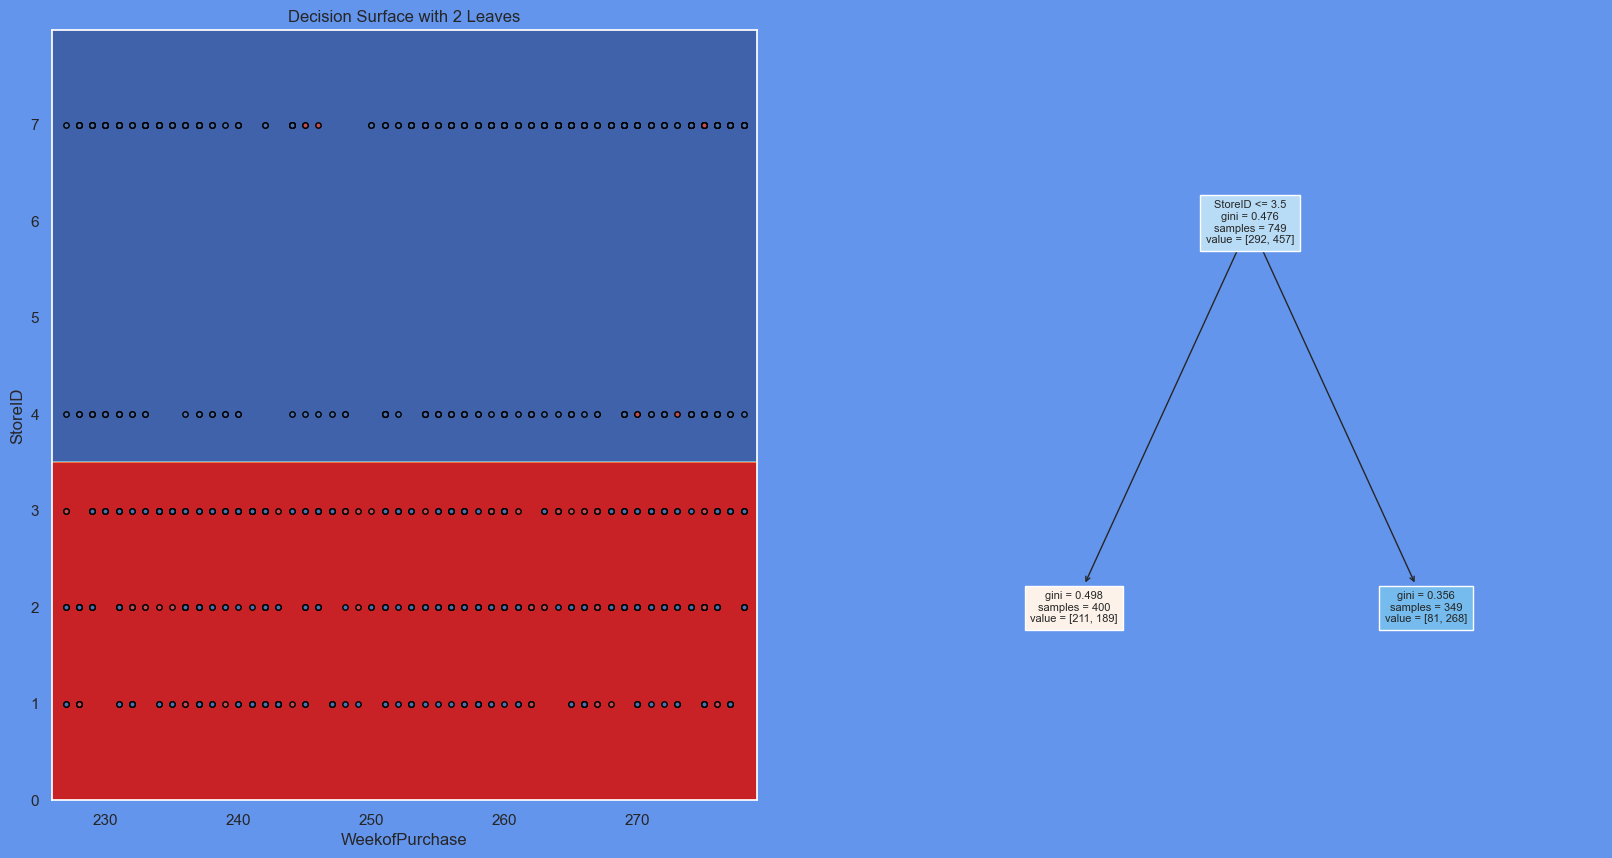

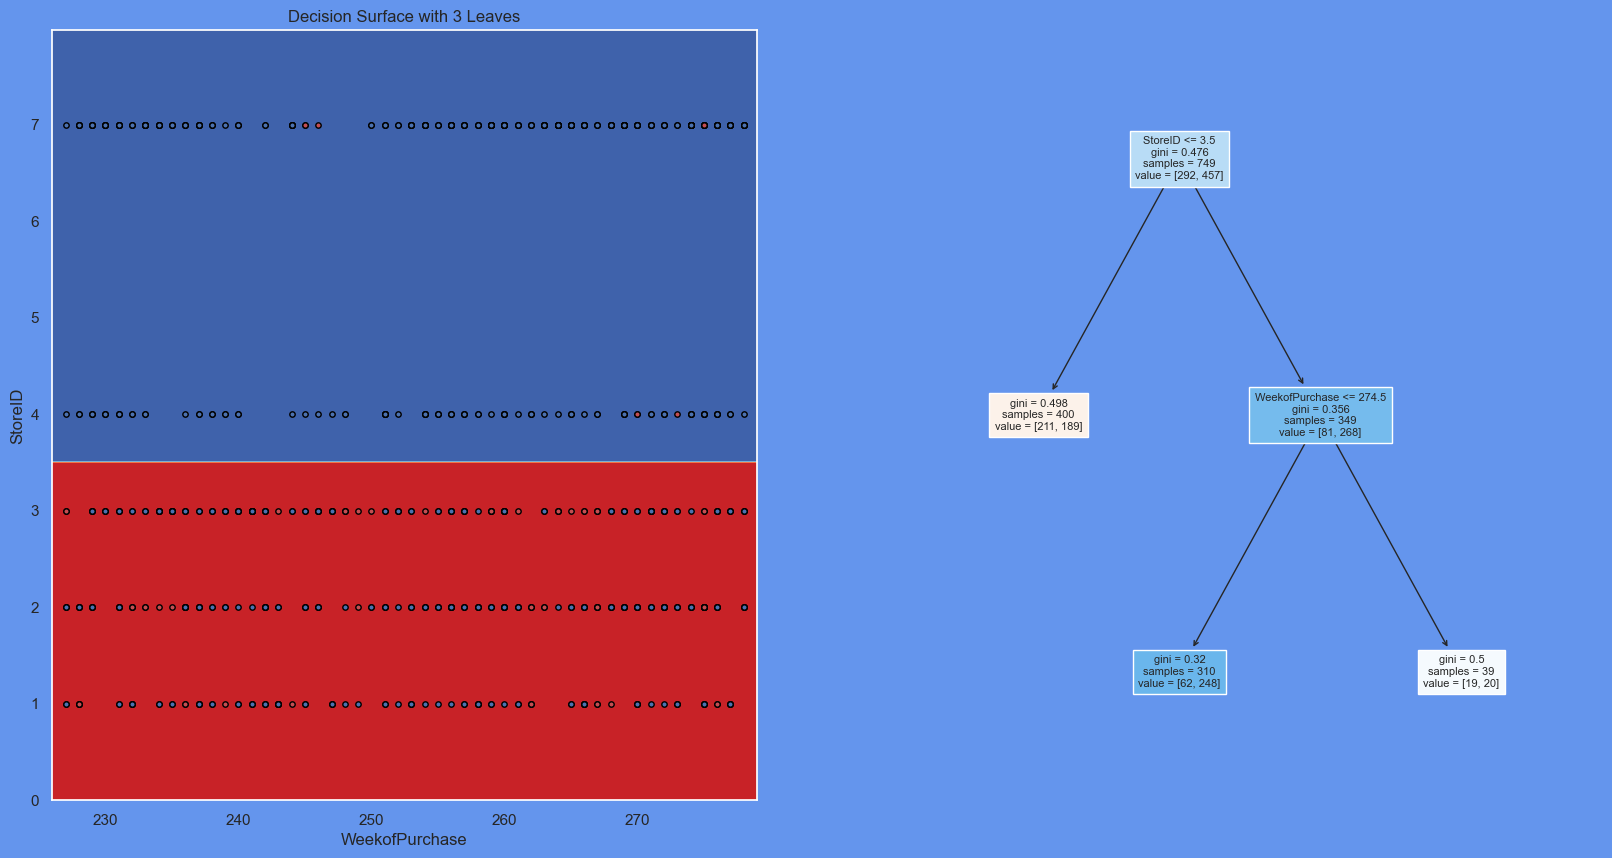

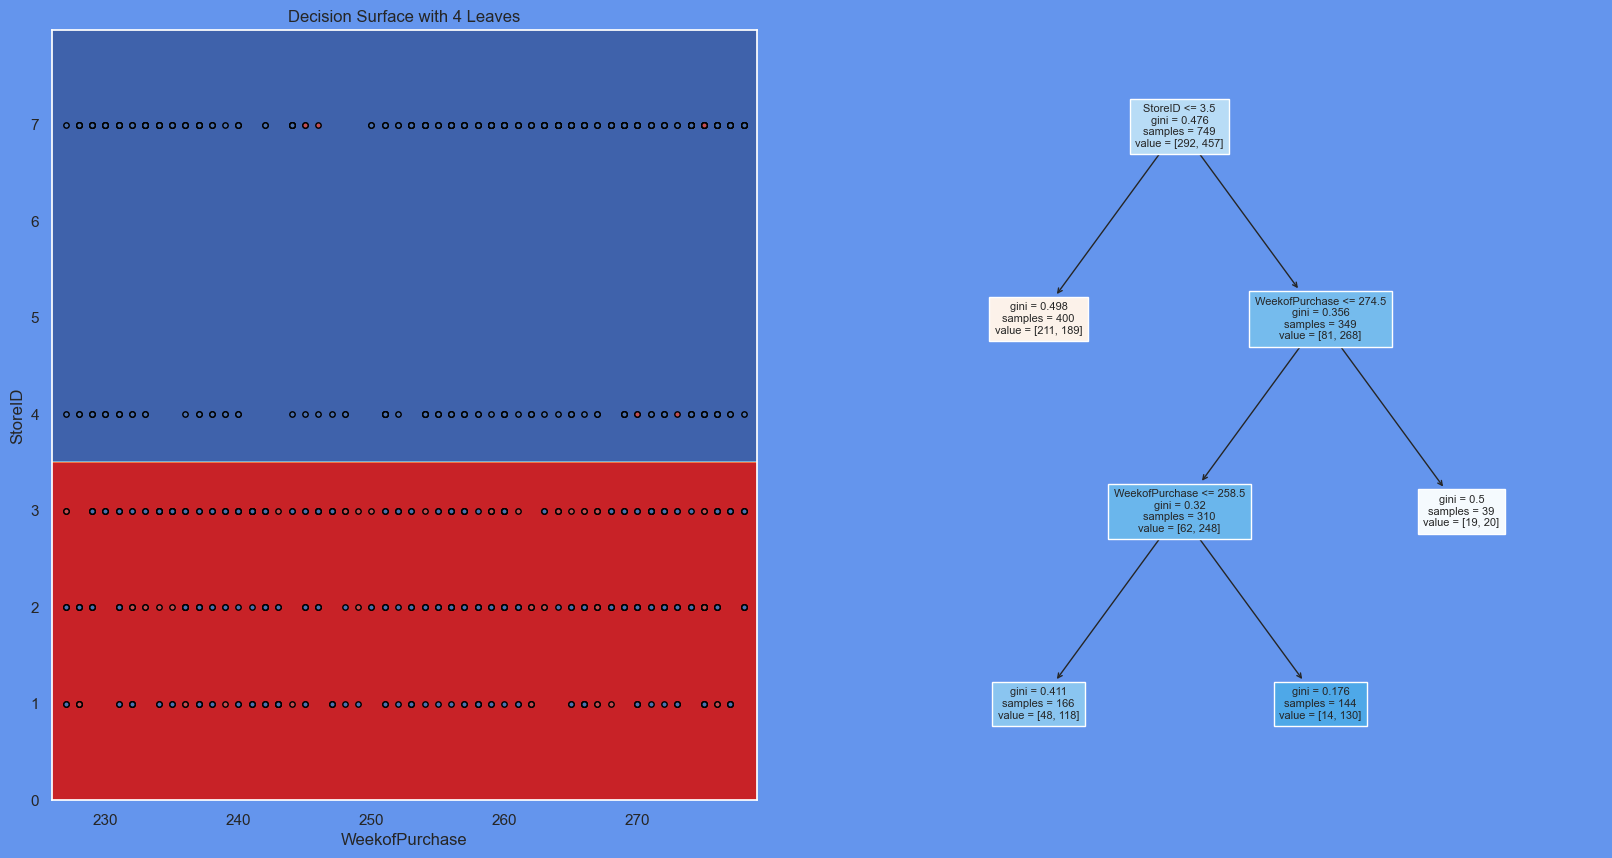

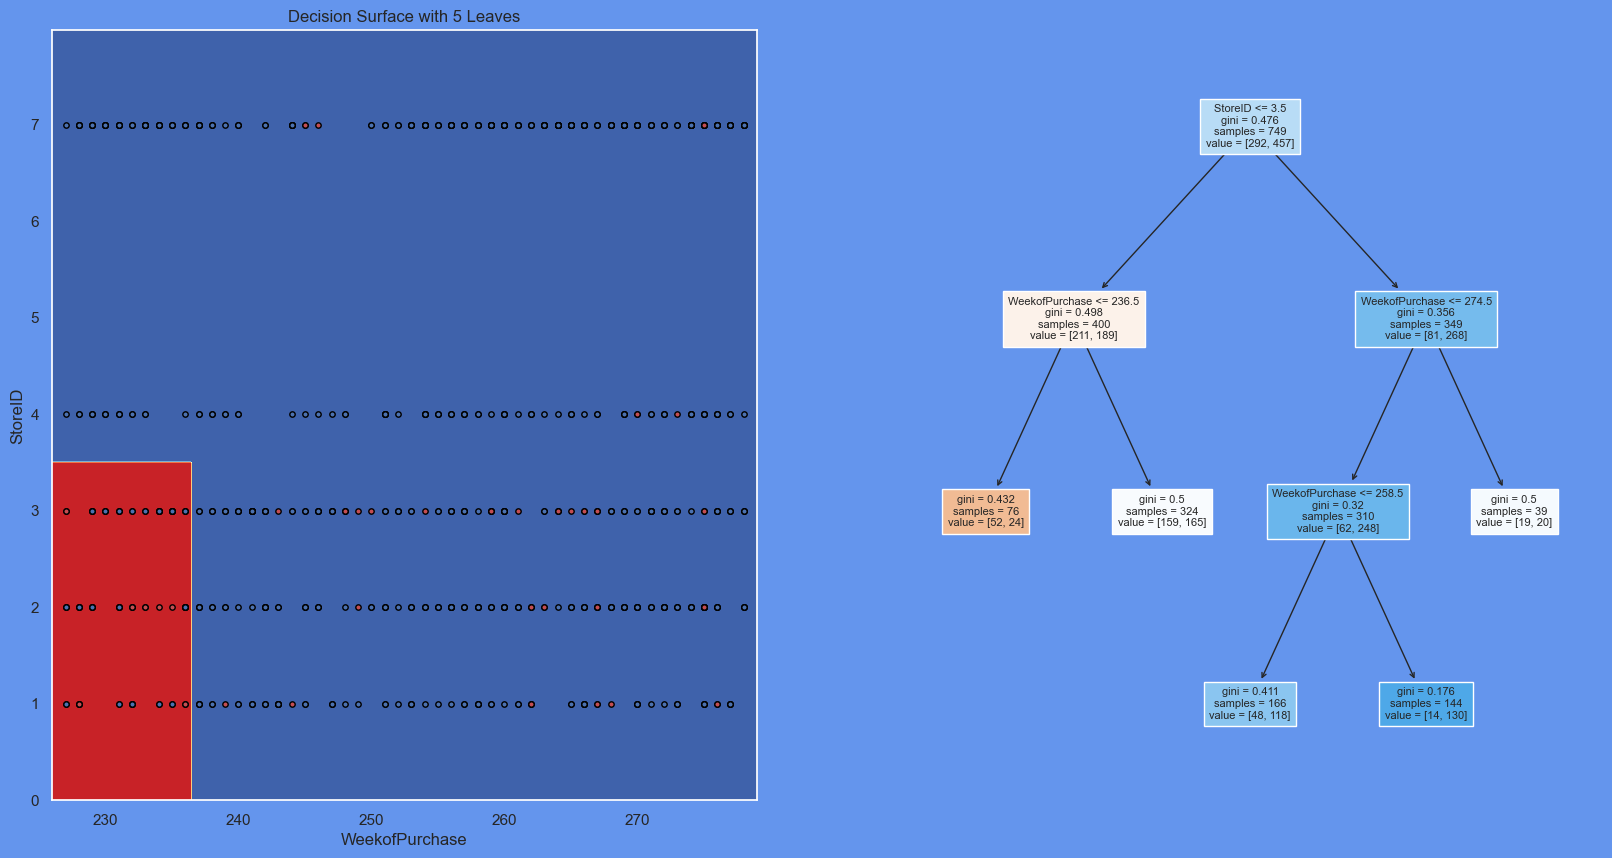

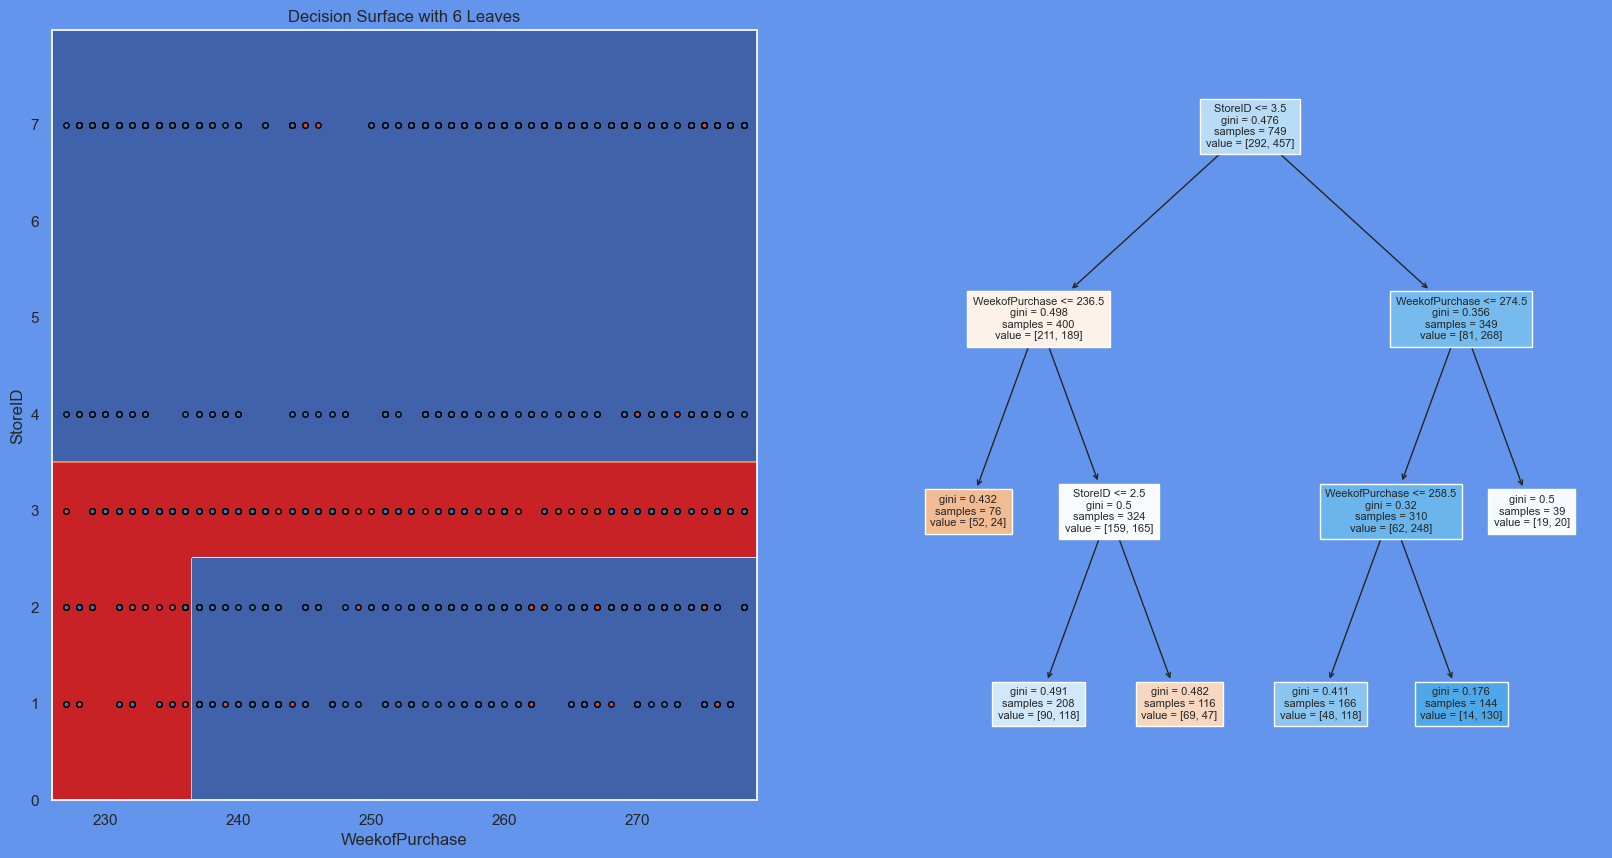

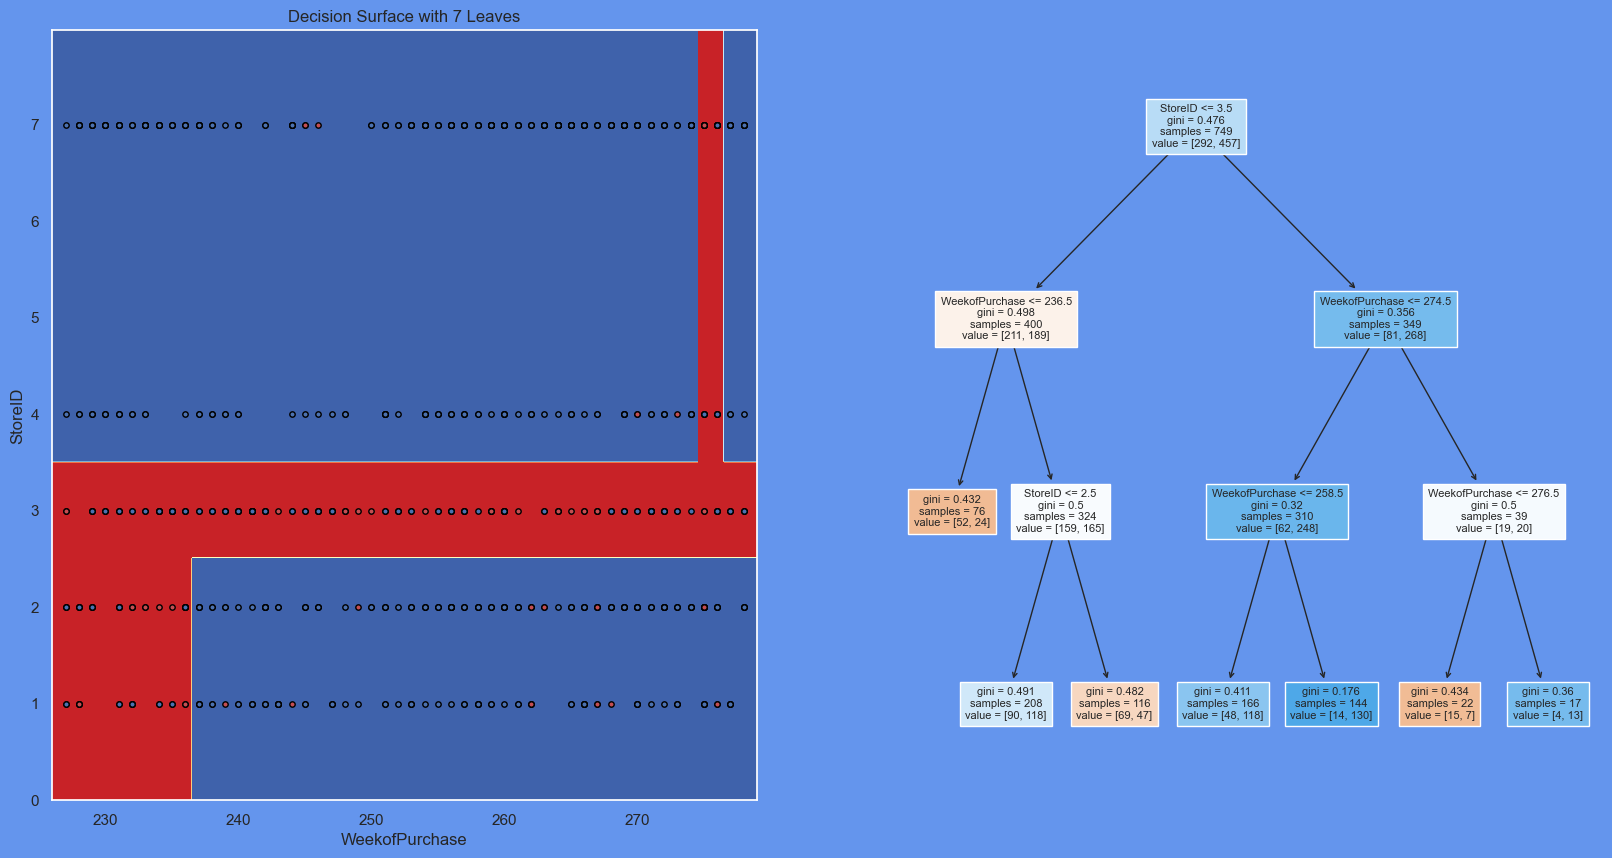

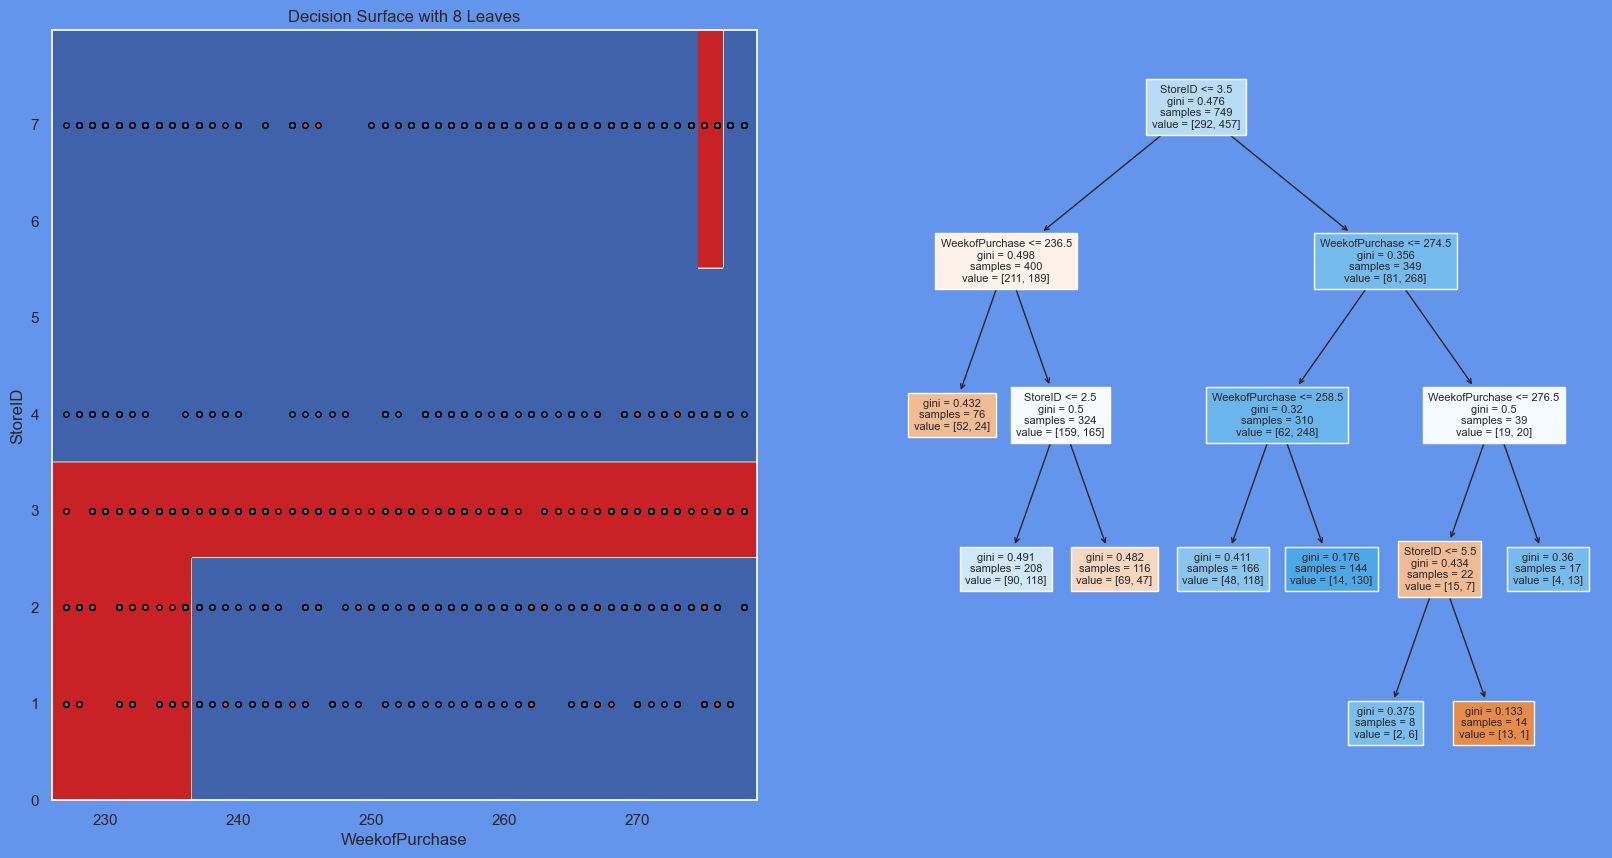

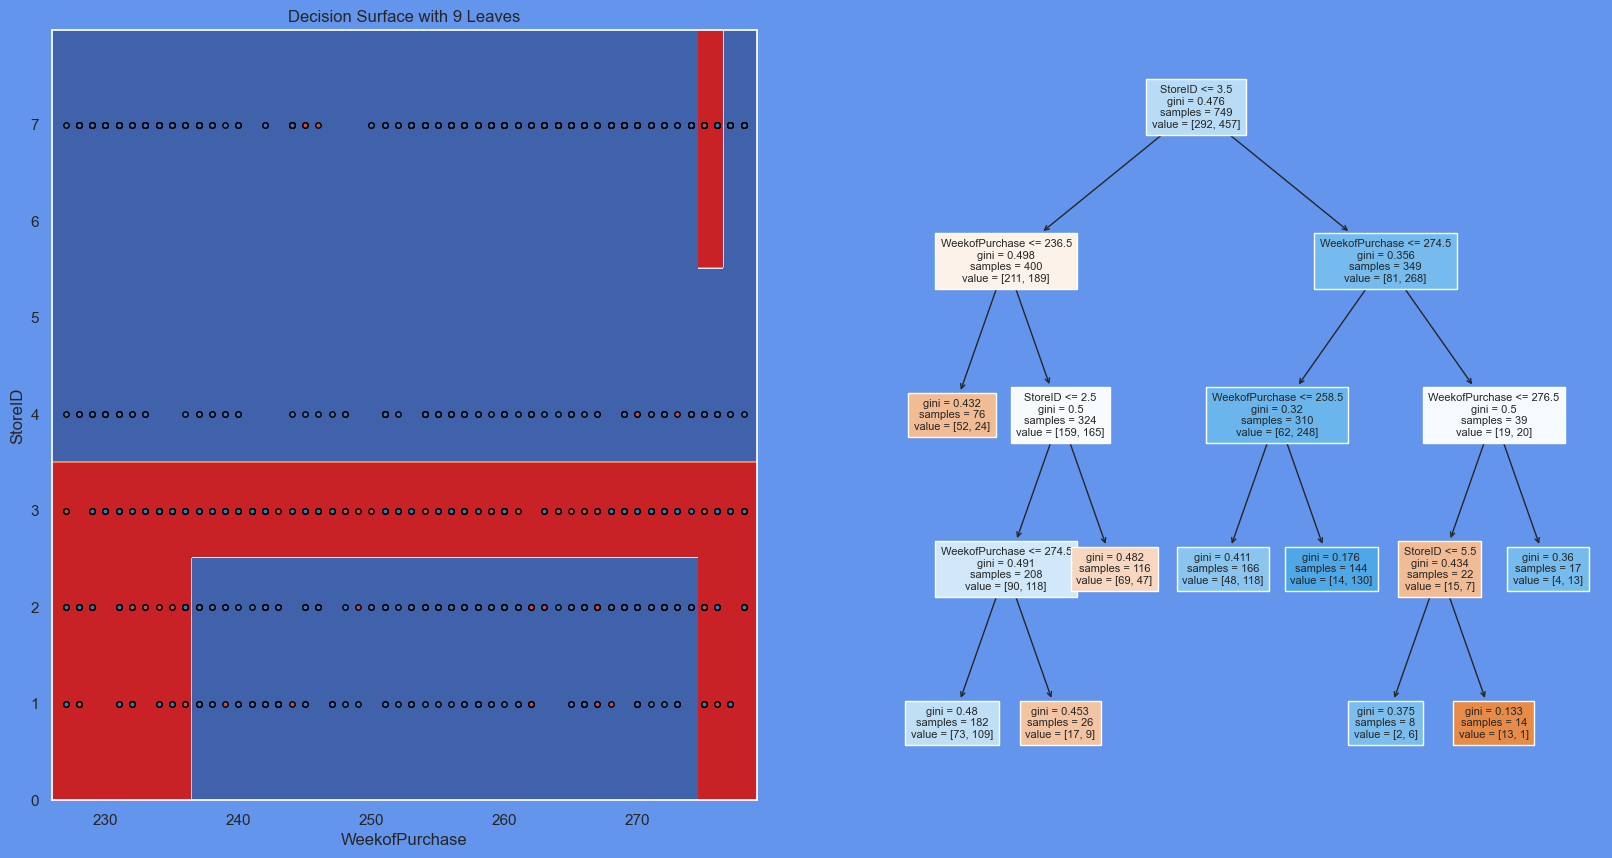

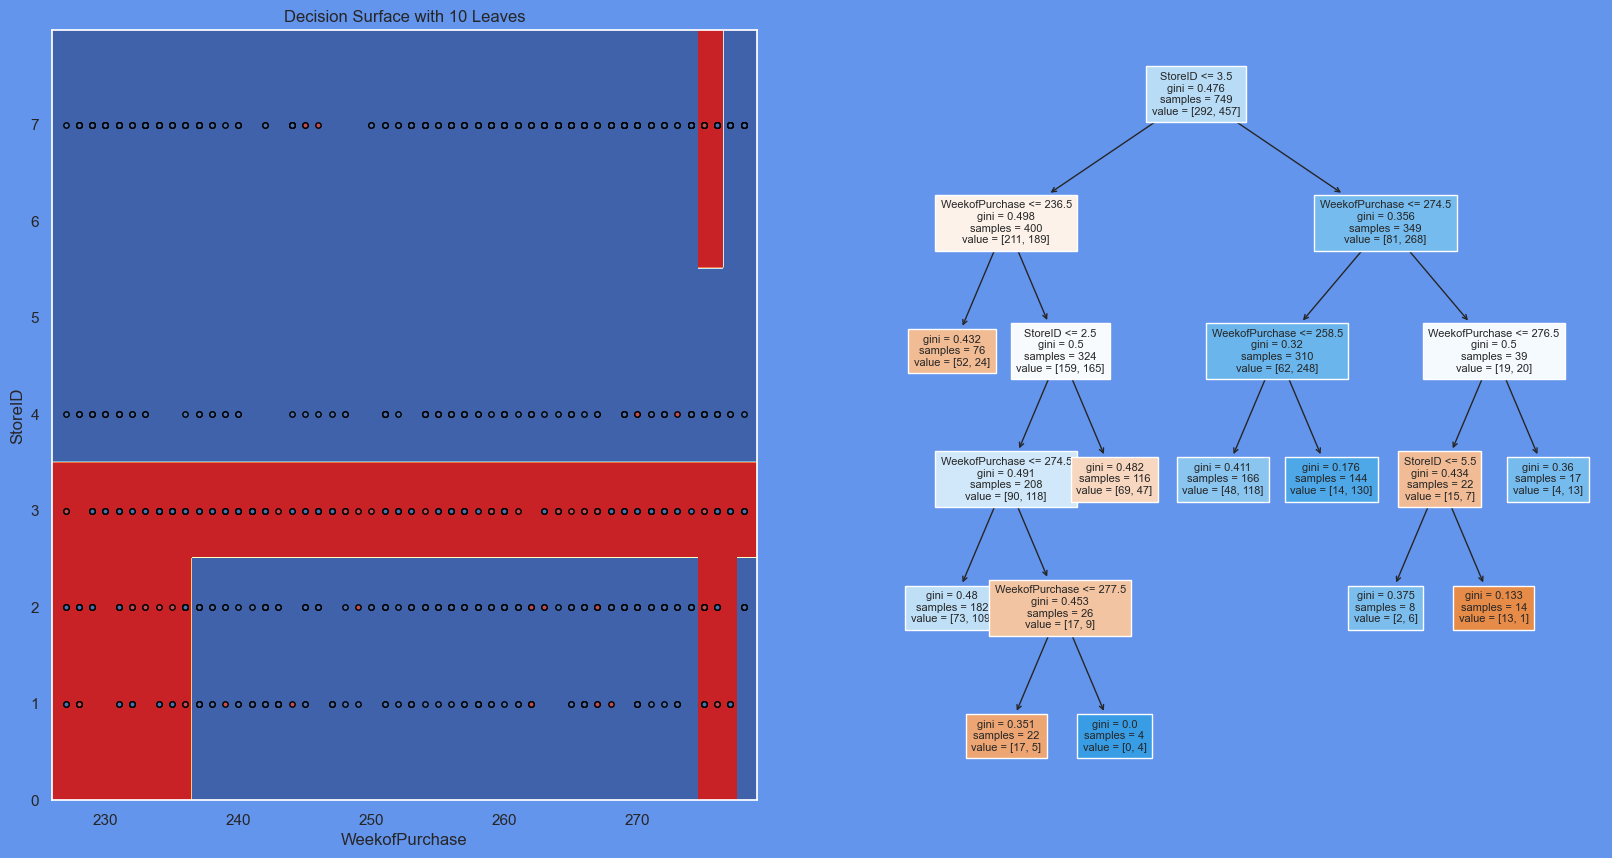

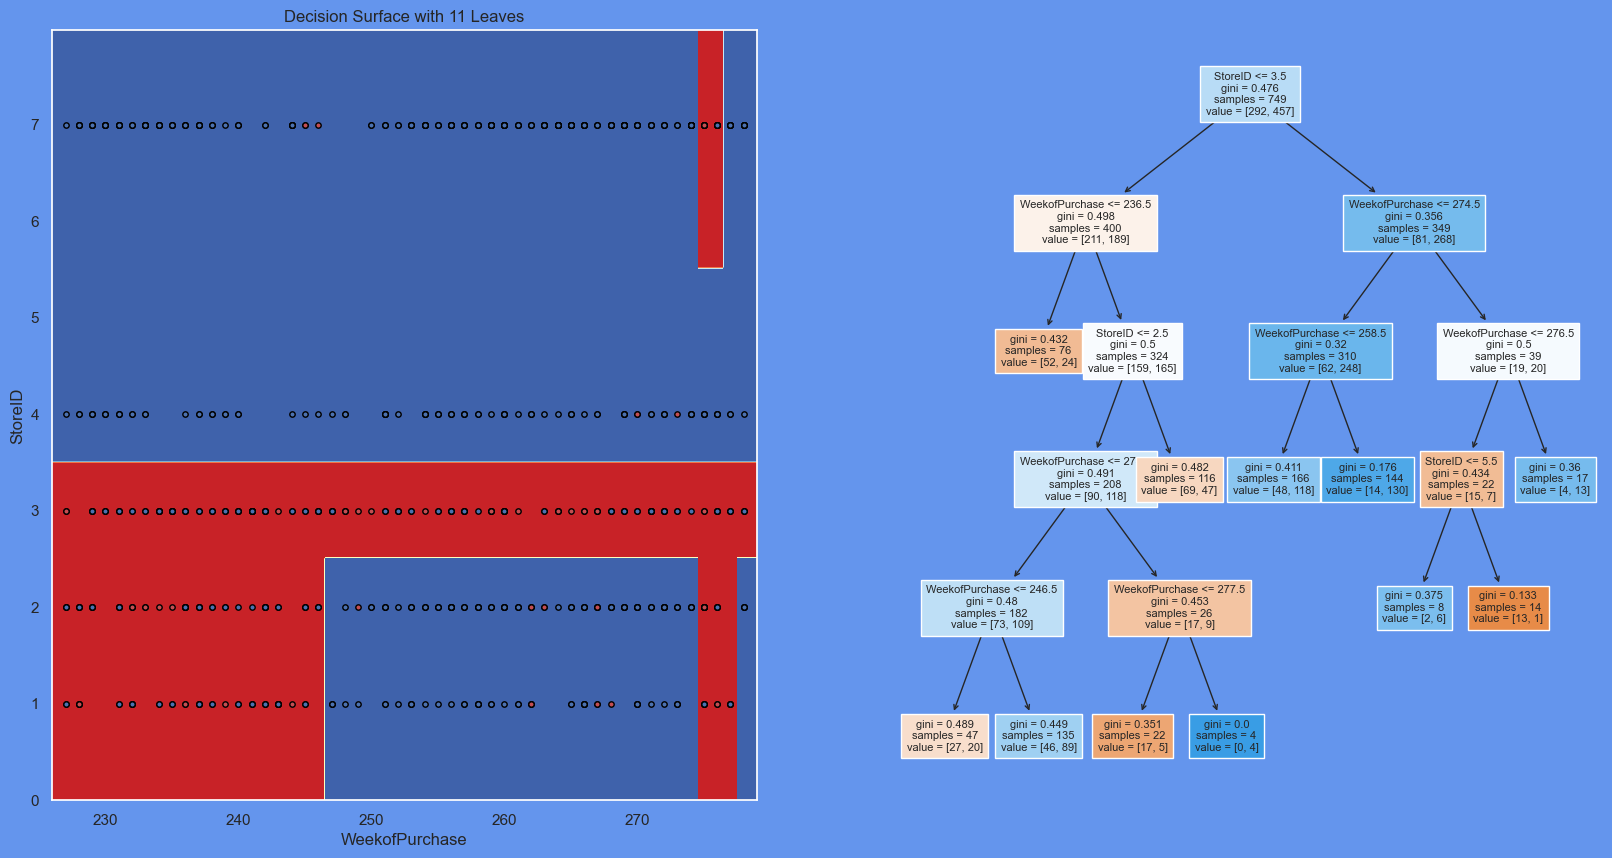

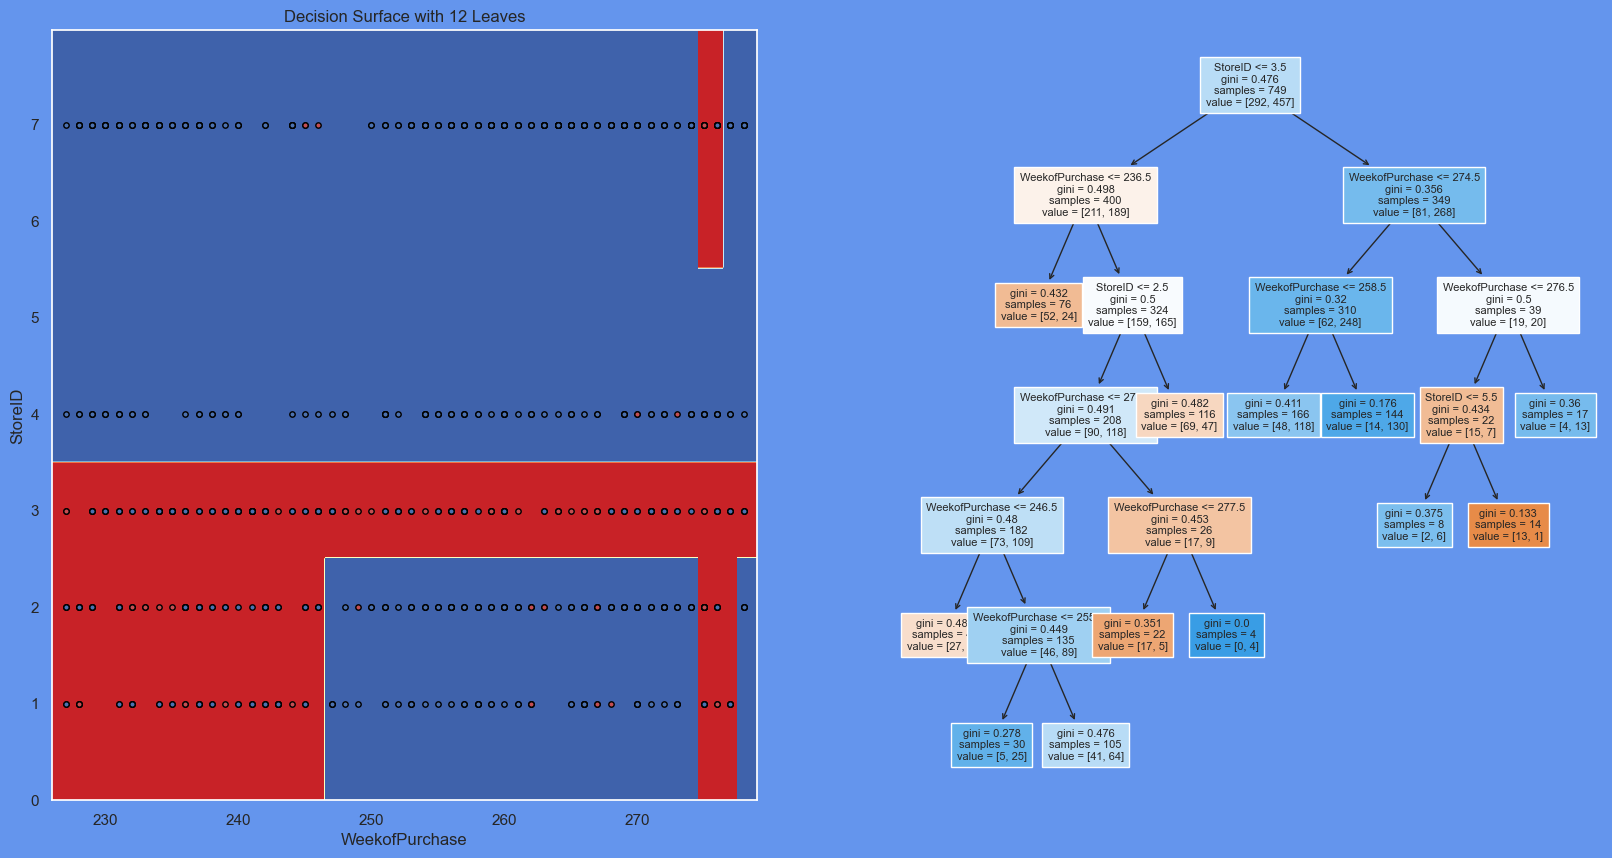

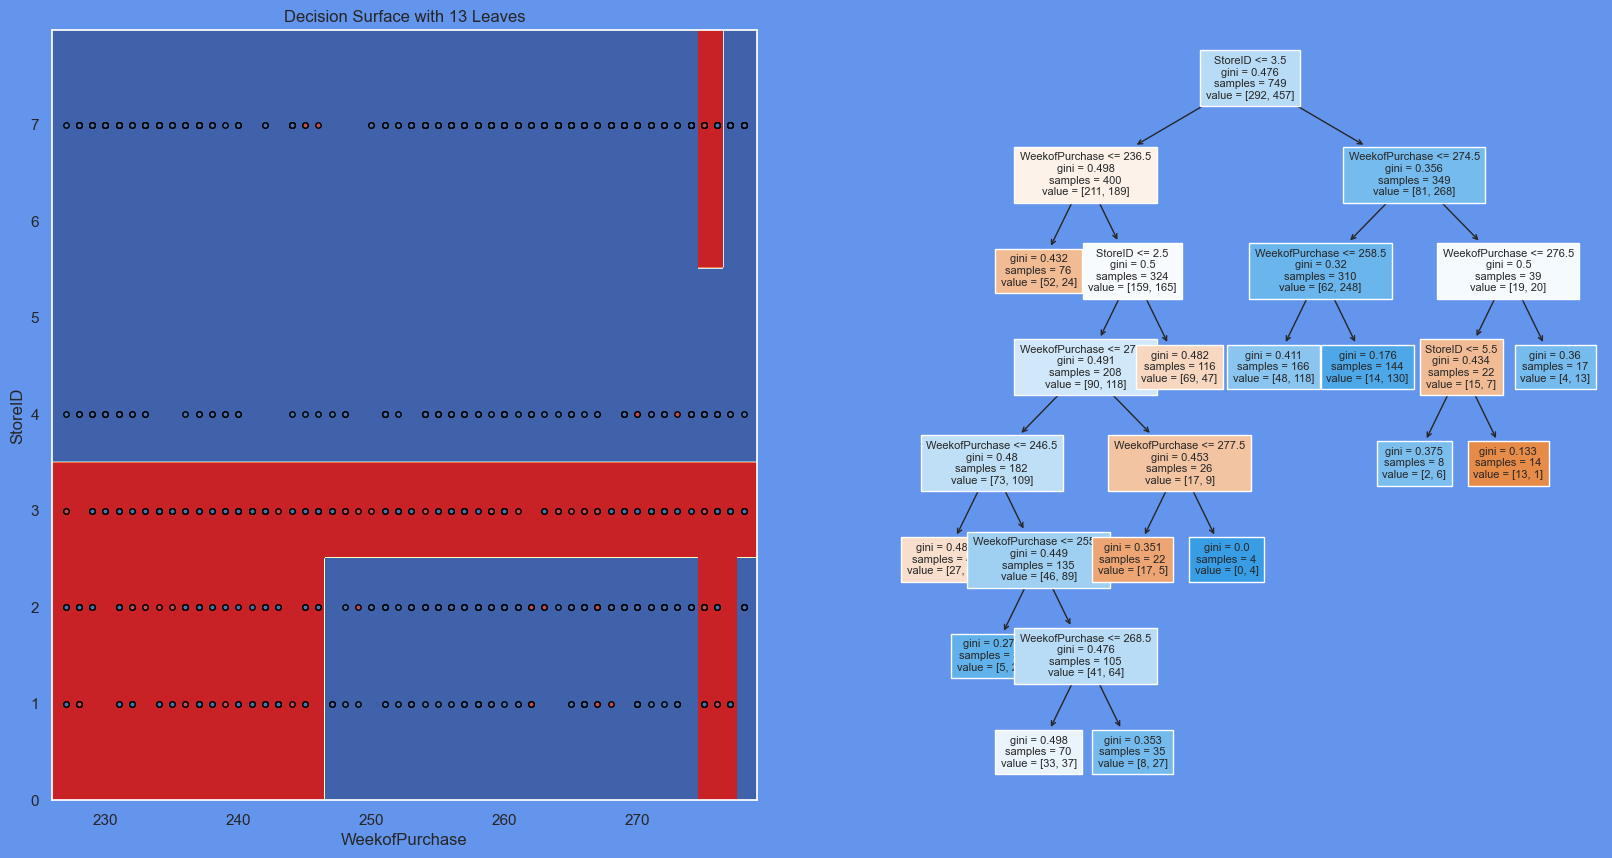

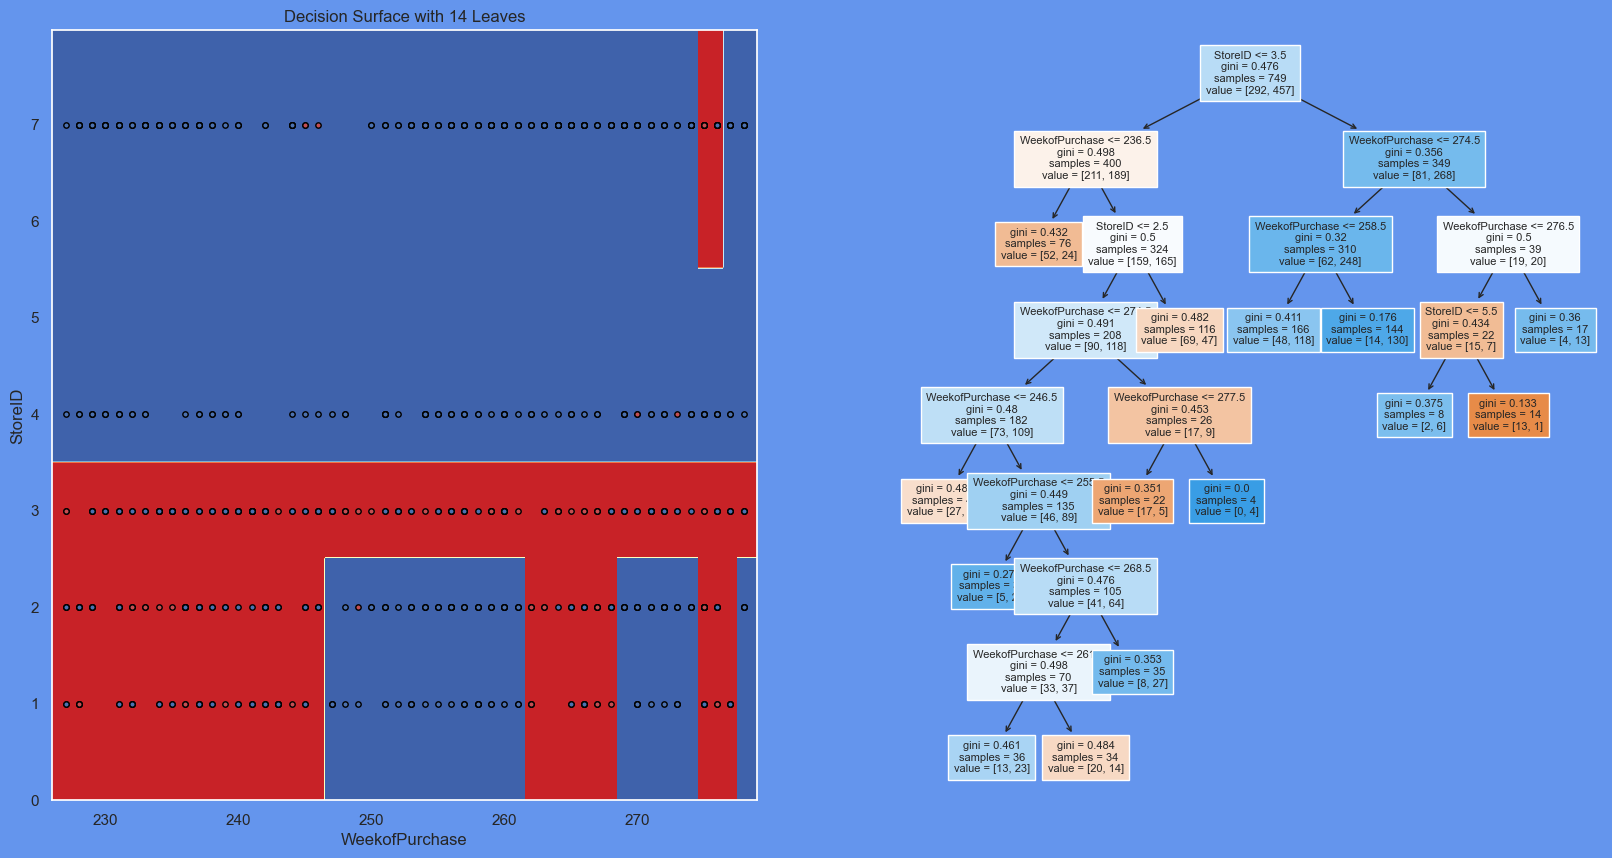

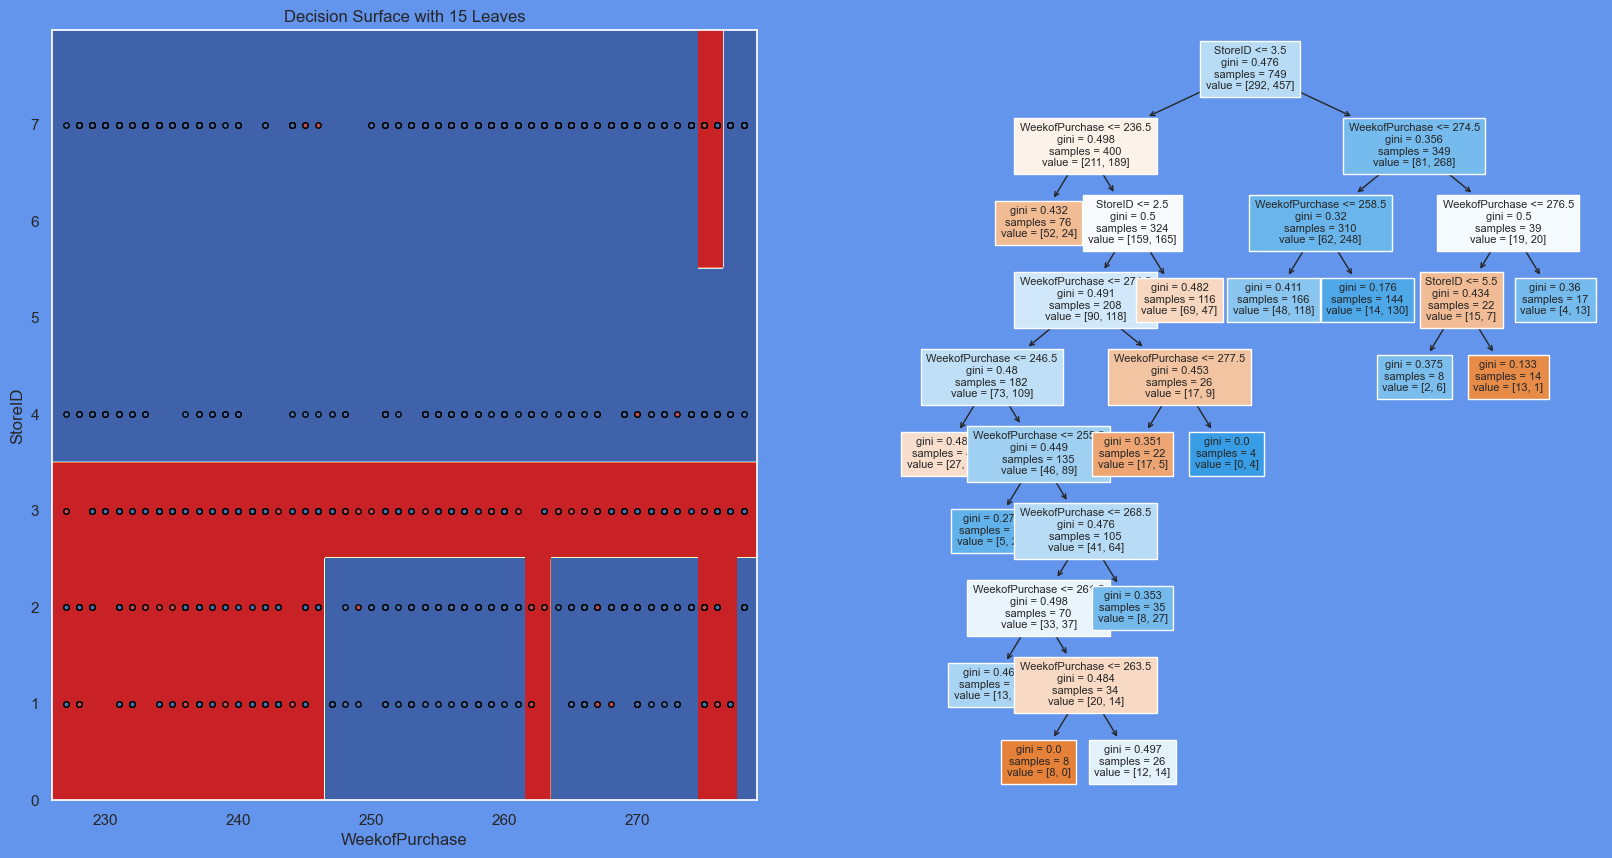

In [293]:
# Use only 2 features
features_2D = [
    'WeekofPurchase',
    'StoreID'
]

X_train_2D = X_train[features_2D]

# Make the tree iteratively larger
for max_leaves in range(2, 16):
    
    # Fit the model with an increasing maximum depth
    model = DecisionTreeClassifier(
        max_leaf_nodes=max_leaves,
        random_state=2,
        criterion='gini'
    ).fit(X_train_2D, y_train)

    # Compute the decision areas
    plot_step = 0.02
    x1_min, x1_max = X_train_2D.iloc[:, 0].min() - 1, X_train_2D.iloc[:, 0].max() + 1
    x2_min, x2_max = X_train_2D.iloc[:, 1].min() - 1, X_train_2D.iloc[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, plot_step),
        np.arange(x2_min, x2_max, plot_step)
    )
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # Plot the decision areas
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    axs[0].contourf(xx1, xx2, Z, cmap=plt.cm.RdYlBu)

    # Plot the training observations
    for i, color in zip(range(2), 'rb'):
        idx = np.where(y_train == i)[0]
        axs[0].scatter(
            X_train_2D.iloc[idx, 0],
            X_train_2D.iloc[idx, 1],
            c=color,
            cmap=plt.cm.RdYlBu,
            edgecolor='black',
            s=15
        )
    
    # Plot the tree
    axs[1] = tree.plot_tree(
        model,
        fontsize=8,
        feature_names=features_2D,
        filled=True
    )

    # Plot aestetics
    axs[0].set(
        title=f'Decision Surface with {max_leaves} Leaves',
        xlabel=features_2D[0],
        ylabel=features_2D[1]
    )

Training Accuracy: 0.9933244325767691
Test Accuracy: 0.7601246105919003


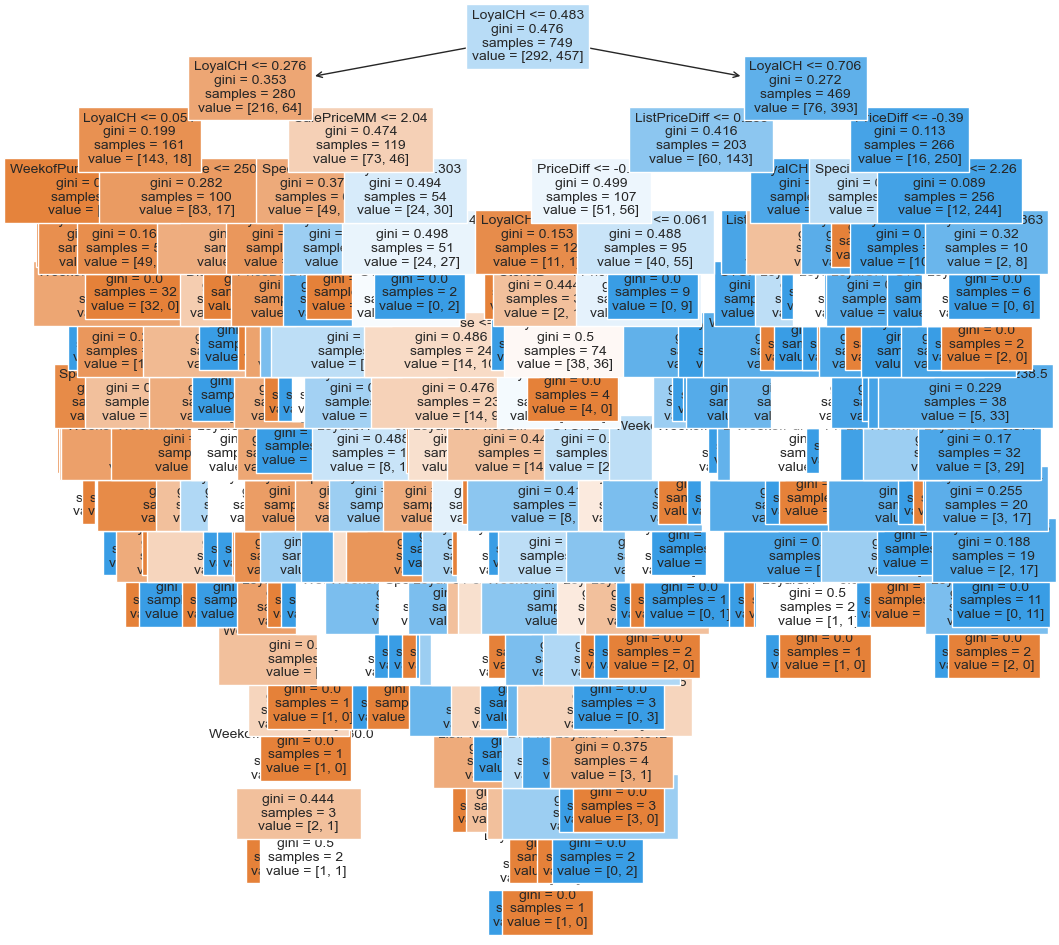

In [294]:
# No stopping criterion
model = DecisionTreeClassifier(
    random_state=2,
    criterion='gini').fit(X_train, y_train)

print(f'Training Accuracy: {model.score(X_train, y_train)}')
print(f'Test Accuracy: {model.score(X_test, y_test)}')

plt.figure(figsize=(12,12), facecolor='white')
tree.plot_tree(model, fontsize=10, feature_names=X_train.columns, filled=True)
plt.show()

The training accuracy is 0.9933244325767691.

# Question 9(iii)

Training Accuracy: 0.8210947930574098
Test Accuracy: 0.8068535825545171


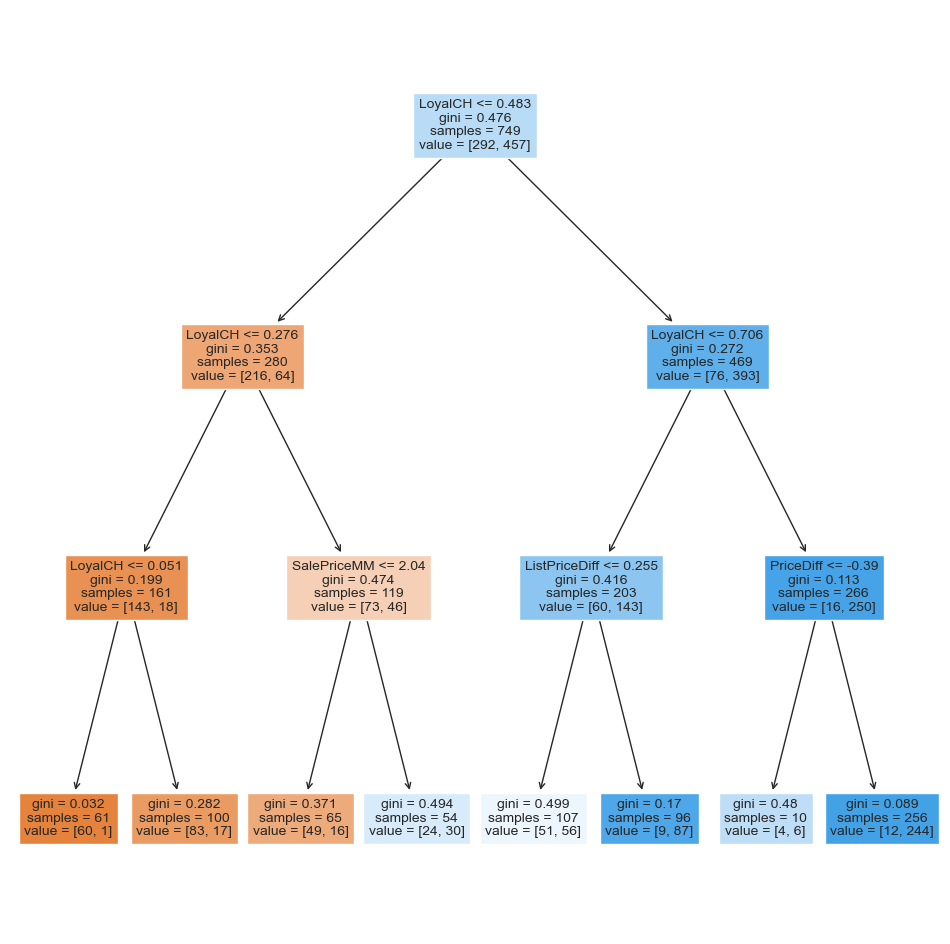

In [247]:
# Maximum depth
model = DecisionTreeClassifier(
    max_depth=3,
    random_state=2,
    criterion='gini').fit(X_train, y_train)

print(f'Training Accuracy: {model.score(X_train, y_train)}')
print(f'Test Accuracy: {model.score(X_test, y_test)}')

plt.figure(figsize=(12,12), facecolor='white')
tree.plot_tree(model, fontsize=10, feature_names=X_train.columns, filled=True)
plt.show()

There are eight terminal nodes. The first one lists that total number of samples in the node (61), there are 60 samples of 0 in the node, 1 sample of 1 in the node, and that the level of node purity is low which means that the node contains predominantly observations from the same class (gini=0.032).

# Question (9iv)

In [268]:
print(f'Test Accuracy: {model.score(X_test, y_test)}')

Test Accuracy: 0.8068535825545171


In [295]:
print(f'Test Accuracy: {model.score(X_test, y_test)}')

Test Accuracy: 0.7601246105919003


The test accuracy is 0.8068535825545171 for the pruned tree and 0.7601246105919003 for the unpruned tree. The error would be the inverse of these numbers. 

Text(47.25, 0.5, 'Actual Values')

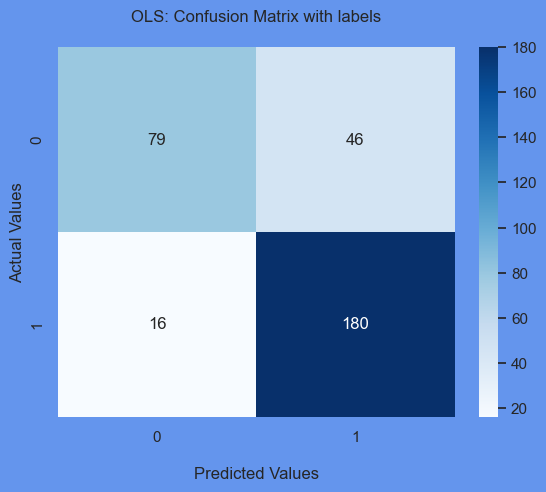

In [250]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))
sns.set(rc={'figure.facecolor': 'cornflowerblue'})
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
ax.set_title('OLS: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

# Question (9v)

In [251]:
tree = DecisionTreeClassifier(random_state=2)
path = tree.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas
kf = KFold(n_splits=5, random_state = 13, shuffle=True)
tree_test_ac = []
for a in alphas:
    tree = DecisionTreeClassifier(ccp_alpha=a, random_state=2)
    cv_results = cross_val_score(tree, X_train, y_train, cv=kf)
    tree_test_ac.append(cv_results.mean())

Text(0, 0.5, 'CV Score (Accuracy)')

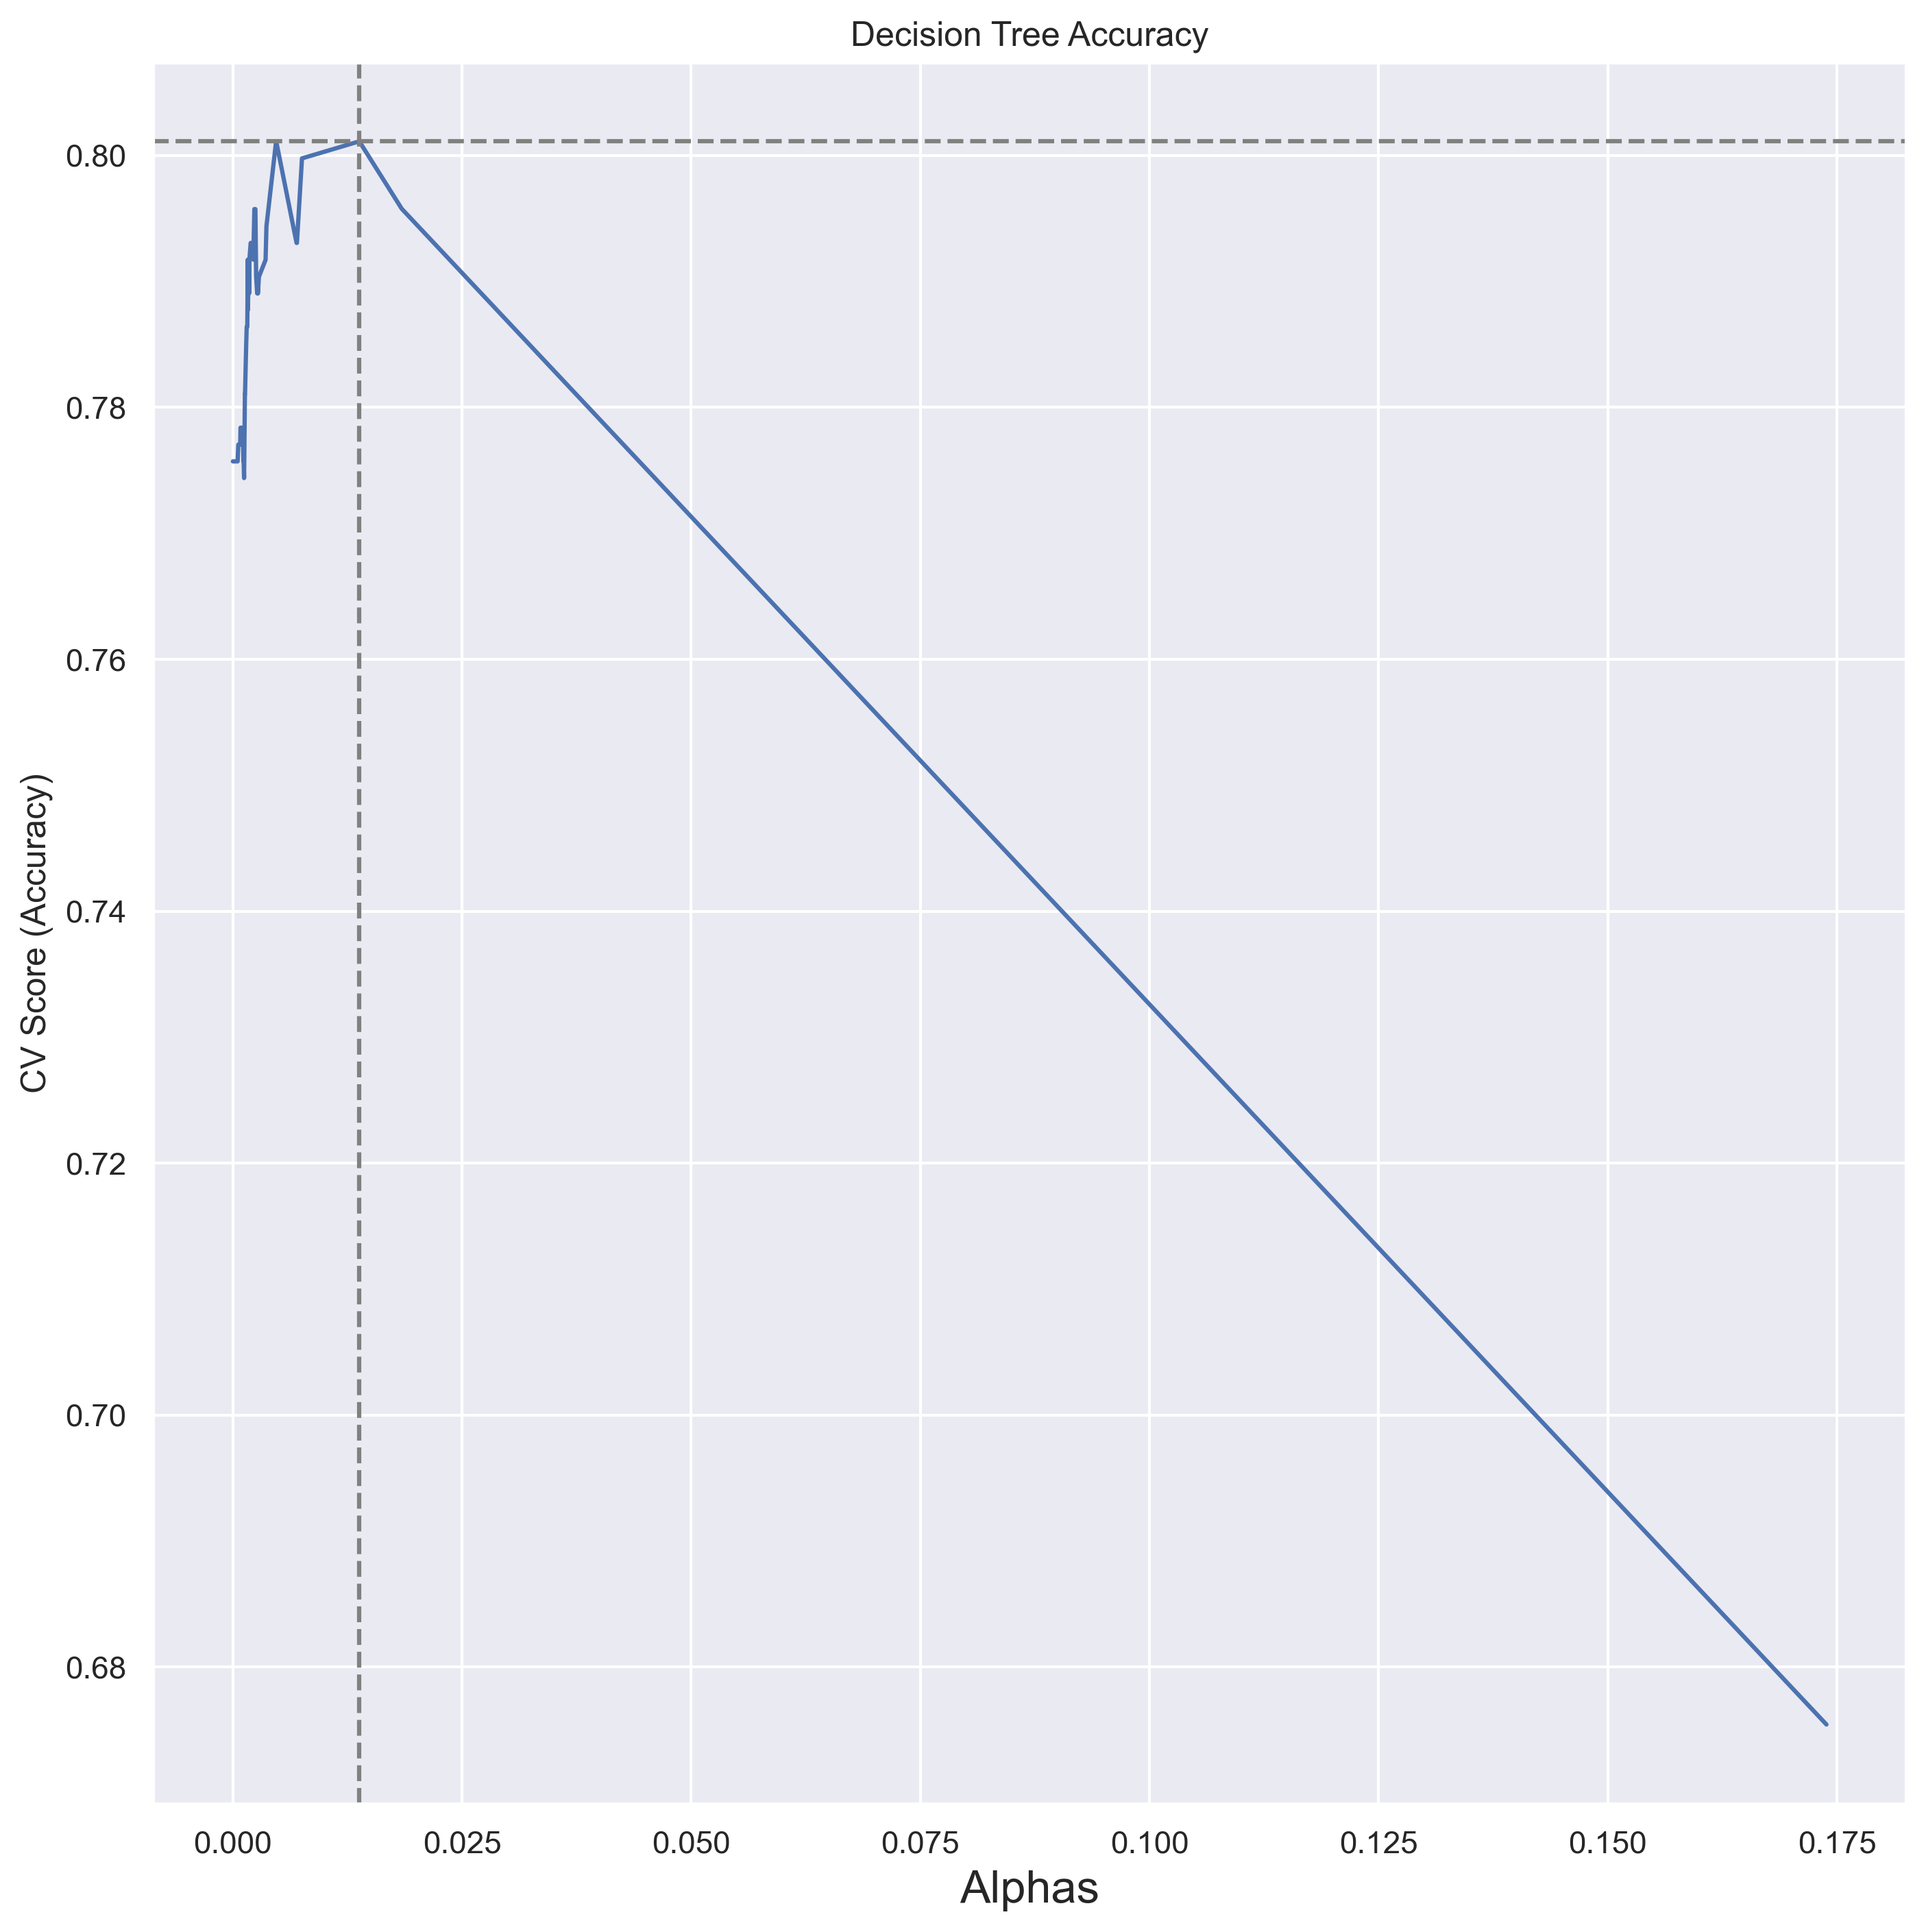

In [252]:
#cv_results = []
#for mean_score in zip(tree_test_ac.cv_results_["mean_test_score"]):
#    cv_results.append(mean_score[0])

# Plot the accuracies
plt.figure(figsize=(11,11), facecolor='white', dpi=300)
sns.lineplot(x=alphas, y=tree_test_ac)

# Highlight the best accuracy
plt.axhline(y=max(tree_test_ac), color = 'grey', linestyle = '--')
plt.axvline(x=alphas[tree_test_ac.index(max(tree_test_ac))], color = 'grey', linestyle = '--')

# Add labels
plt.title('Decision Tree Accuracy')
plt.xlabel("Alphas", fontsize= 16)
plt.ylabel('CV Score (Accuracy)')

In [253]:
alpha_dict = dict(zip(alphas, tree_test_ac))
max_accuracy = max(alpha_dict, key=alpha_dict.get)
print(max_accuracy)

0.01379269302194669


The a that corresponds to the lowest cross-validated classification error rate is 0.01379269302194669.

# Question (9vi)

In [254]:
tree_size = []
for a in alphas:
    cost_tree = DecisionTreeClassifier(ccp_alpha=a, random_state=2).fit(X_train, y_train)
    leaves = cost_tree.get_n_leaves()
    tree_size.append(leaves)

Text(0, 0.5, 'Number of Leaves')

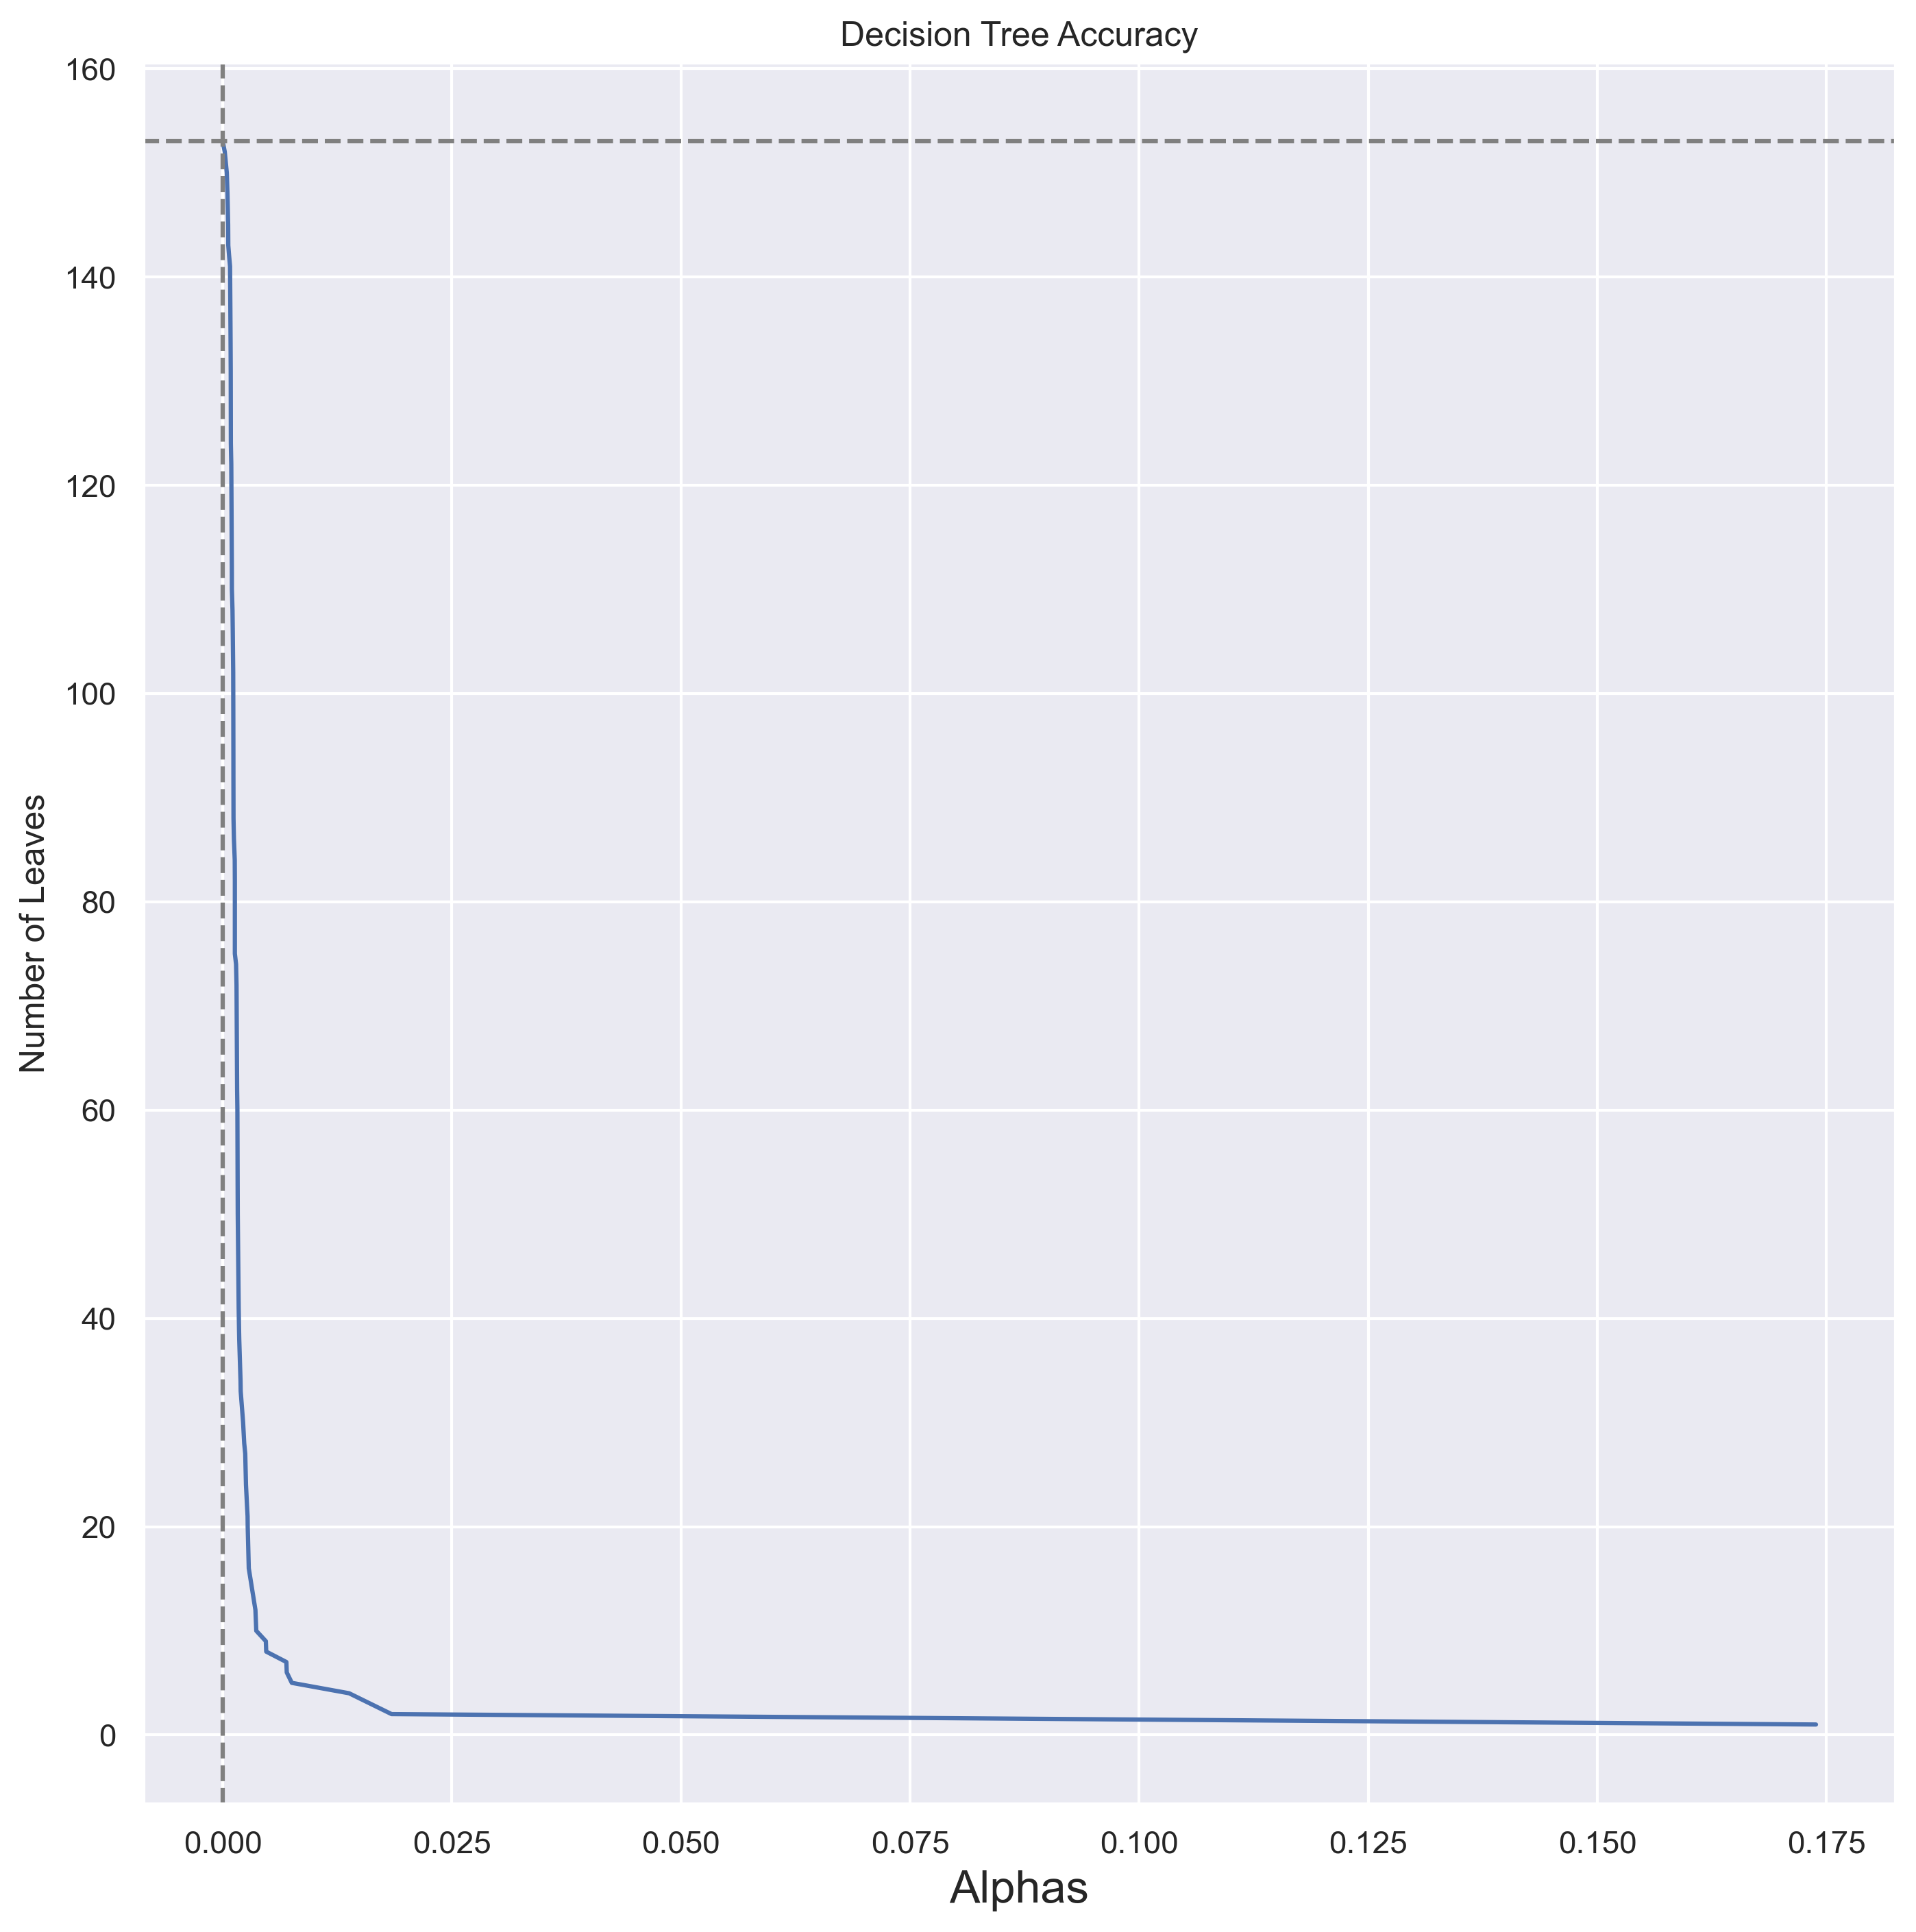

In [255]:
plt.figure(figsize=(11,11), facecolor='white', dpi=300)
sns.lineplot(x=alphas, y=tree_size)
plt.axhline(y=max(tree_size), color = 'grey', linestyle = '--')
plt.axvline(x=alphas[tree_size.index(max(tree_size))], color = 'grey', linestyle = '--')
plt.title('Decision Tree Accuracy')
plt.xlabel("Alphas", fontsize= 16)
plt.ylabel('Number of Leaves')

Alpha is a nonnegative tuning parameter where each a corresponds to a specific subtree. As a get further from zero we prune more and more branches get pruned. That being said, it is important to remember that there is a tradeoff between the subtree's complexity and its fit to the data. 

# Question 9(vii)

In [256]:
accuracy = []
number_leaves = []
for a in alphas:
    cost_tree = DecisionTreeClassifier(ccp_alpha=a, random_state=2).fit(X_train, y_train)
    cv_results = cross_val_score(cost_tree, X_train, y_train, cv=kf)
    accuracy.append(cv_results.mean())
    leaves = cost_tree.get_n_leaves()
    number_leaves.append(leaves)

In [257]:
tree_df = pd.DataFrame({'alpha':alphas, 'accuracy':accuracy, 'leaves':number_leaves})

In [258]:
max_dict = dict(tree_df.loc[tree_df['accuracy'].idxmax()])

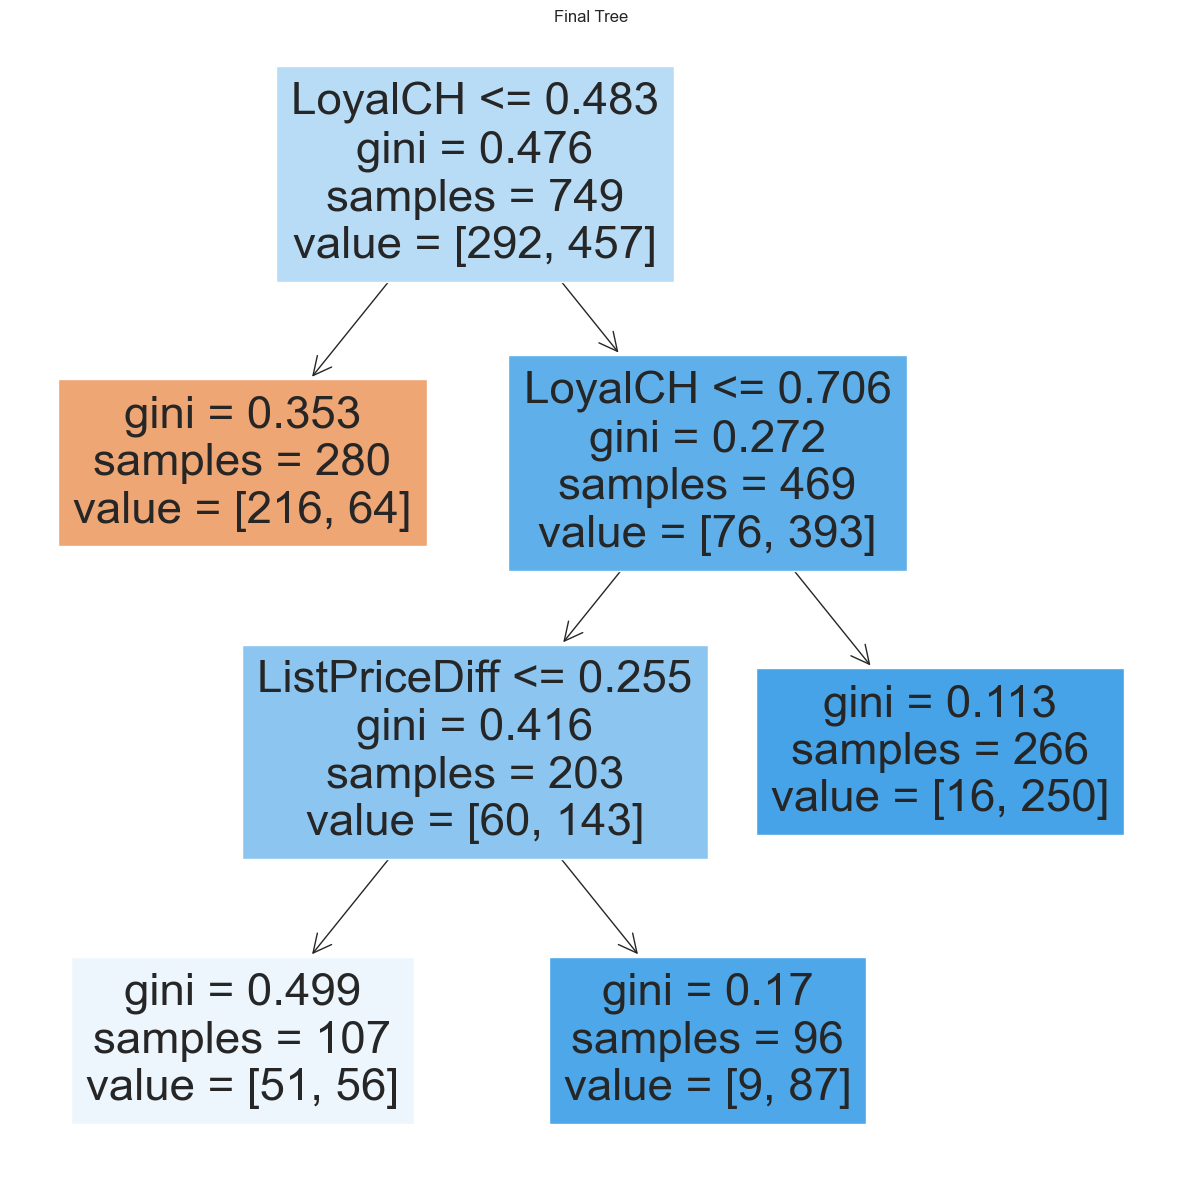

In [296]:
alpha = int(max_dict['alpha'])
leaves = int(max_dict['leaves'])
optimum_tree = DecisionTreeClassifier(ccp_alpha=alpha, random_state=2,max_leaf_nodes=leaves).fit(X_train, y_train)
plt.figure(figsize=(15,15), facecolor='white')
tree.plot_tree(optimum_tree, feature_names=X_train.columns, filled=True)
plt.title('Final Tree')
plt.show()

# Question 9(vii)

In [264]:
training_unpruned = model.score(X_train, y_train)
print(training_unpruned)

0.8210947930574098


In [265]:
training_pruned = optimum_tree.score(X_train, y_train)
print(training_pruned)

0.8130841121495327


The training error for both trees are relatively low as shown by the high R2. The training error for the optimum tree is slightly higher. This make sense because we are just looking at training error and the unpruned tree has a higher probability of overfitting. 

# Question 9(ix)

In [266]:
test_unpruned = model.score(X_test, y_test)
print(test_unpruned)

0.8068535825545171


In [267]:
test_pruned = optimum_tree.score(X_test, y_test)
print(test_pruned)

0.8006230529595015


The test error for both models is relatively low but surprisingly the unpruned model is still the one with the higher R2 and thus lower error. That being said, it is also likely to have higher variance which means the results will be less accurate if we were using a different dataset because the unpruned tree is not capturing the fundamental relationship between the variables as well as the pruned tree. 